### Importing Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading dataset

In [2]:
dataset = pd.read_csv("./data/fifa_data.csv", index_col=0)

In [3]:
dataset.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Now we choose our relevant features to predict the label

> Our label is `Overall` and we have to select best features to predict label

In [4]:
dataset.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [5]:
X = dataset[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
        'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
        'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].copy()
X

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,...,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2
18203,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,...,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2
18204,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,...,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2
18205,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,...,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2


In [6]:
y = dataset["Overall"]
y

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64

### **1. Data Pre Processing**

**a. Handling Missing Values**

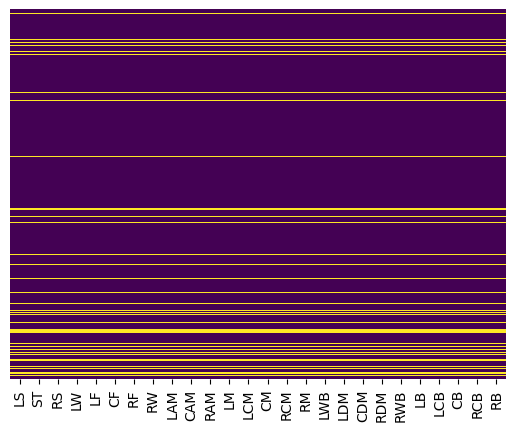

In [7]:
sns.heatmap(X.isnull(), cbar=False, cmap="viridis", yticklabels=False)

plt.show()

In [8]:
X.isnull().sum()

LS     2085
ST     2085
RS     2085
LW     2085
LF     2085
CF     2085
RF     2085
RW     2085
LAM    2085
CAM    2085
RAM    2085
LM     2085
LCM    2085
CM     2085
RCM    2085
RM     2085
LWB    2085
LDM    2085
CDM    2085
RDM    2085
RWB    2085
LB     2085
LCB    2085
CB     2085
RCB    2085
RB     2085
dtype: int64

In [9]:
X.isnull().any(axis=1).sum()

np.int64(2085)

`So we have 2085 rows which have no features so we should drop those rows`

In [10]:
print(X.shape, y.shape)

(18207, 26) (18207,)


In [11]:
X = X.dropna(how="all")
y = y.loc[X.index]

In [12]:
print(X.shape, y.shape)

(16122, 26) (16122,)


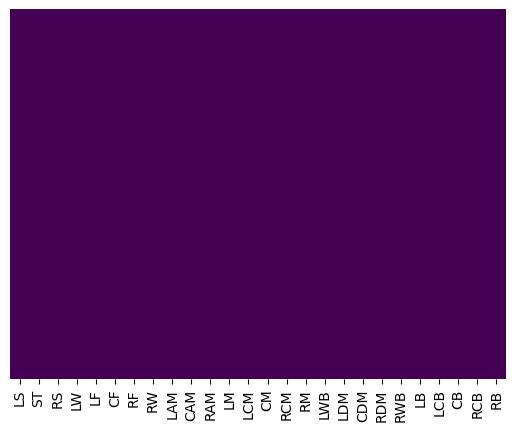

In [13]:
sns.heatmap(X.isnull(), cbar=False, cmap="viridis", yticklabels=False)

plt.show()

In [14]:
for col in X.columns:
    X[col] = X[col].apply(eval)

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_6096\250906385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(eval)


In [15]:
X.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,...,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,...,68,63,63,63,68,63,50,50,50,63
4,85,85,85,90,90,90,90,90,91,91,...,80,80,80,80,80,76,69,69,69,76
5,86,86,86,92,91,91,91,92,92,92,...,69,66,66,66,69,63,52,52,52,63


**b. Now we will seperate the data into testing data and training data**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # testing data = 0.2 or 20%

**c. Now we will scale the data using Z-score scaling**

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialise the scaler
scaler = StandardScaler()

# Fit the scaler on X and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [19]:
X_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)

In [20]:
X_train.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
1,3.730313,3.730313,3.730313,3.122886,3.267931,3.267931,3.267931,3.122886,3.059781,3.059781,...,0.942277,0.512431,0.512431,0.512431,0.942277,0.542979,-0.136382,-0.136382,-0.136382,0.542979
2,2.965331,2.965331,2.965331,3.122886,3.166550,3.166550,3.166550,3.122886,3.161845,3.161845,...,0.942277,0.413498,0.413498,0.413498,0.942277,0.438289,-0.648216,-0.648216,-0.648216,0.438289
5,2.856048,2.856048,2.856048,3.122886,3.065168,3.065168,3.065168,3.122886,3.161845,3.161845,...,1.053439,0.710297,0.710297,0.710297,1.053439,0.438289,-0.477604,-0.477604,-0.477604,0.438289
6,2.200348,2.200348,2.200348,2.718817,2.659641,2.659641,2.659641,2.718817,2.957717,2.957717,...,2.832029,2.491092,2.491092,2.491092,2.832029,2.427393,1.399119,1.399119,1.399119,2.427393
7,3.511747,3.511747,3.511747,3.021869,3.166550,3.166550,3.166550,3.021869,2.957717,2.957717,...,1.609248,1.402829,1.402829,1.402829,1.609248,1.275807,0.887286,0.887286,0.887286,1.275807


In [21]:
X_test.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,3.293180,3.293180,3.293180,3.324920,3.470695,3.470695,3.470695,3.324920,3.468039,3.468039,...,0.719953,0.413498,0.413498,0.413498,0.719953,0.228910,-0.733521,-0.733521,-0.733521,0.228910
4,2.746764,2.746764,2.746764,2.920851,2.963786,2.963786,2.963786,2.920851,3.059781,3.059781,...,2.276220,2.095360,2.095360,2.095360,2.276220,1.799255,0.972591,0.972591,0.972591,1.799255
10,3.293180,3.293180,3.293180,2.516783,2.862404,2.862404,2.862404,2.516783,2.549459,2.549459,...,0.497630,0.611364,0.611364,0.611364,0.497630,0.228910,0.204841,0.204841,0.204841,0.228910
16,3.183897,3.183897,3.183897,2.415765,2.659641,2.659641,2.659641,2.415765,2.447394,2.447394,...,0.942277,1.007096,1.007096,1.007096,0.942277,0.647668,0.460757,0.460757,0.460757,0.647668
17,3.183897,3.183897,3.183897,2.920851,2.963786,2.963786,2.963786,2.920851,2.855652,2.855652,...,1.498087,1.106029,1.106029,1.106029,1.498087,1.171117,0.546063,0.546063,0.546063,1.171117


### **2. Initialize parameters: weights(w) and bias(b) randomly or as zeroes**

In [22]:
num_features = X_train.shape[1] # number of features = 8 in this case

w = np.zeros((num_features, 1)) # weights vector = 8 x 1 matrix in this case
b = 0 # starting with bias as 0

y_train = y_train.values.reshape(-1, 1) #get values from y_train and converts it to a column vector (training_datasize x 1)

### **3. Define the Hypothesis Function**

In [23]:
# Hypothesis Function: y' = b + w1x1 + w2x2 + ... + w8x8

def predict(X, w, b):
    return np.dot(X, w) + b

# returns dot product of weight vector (W) and feature vector(X) plus bias

### **4. Define the Cost Function (MSE)**

In [24]:
# Cost Function: J(w, b) = (1/2m) * ∑(i=1 to m)[(y'(i) - y(i))^2] (Mean Square Error (MSE)) m = sample size

def compute_cost(X, y, w, b):
    m = X.shape[0] # sample size
    y_pred = predict(X, w, b)

    cost = (1/(2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

# X = feature vector(m x n), y = Label vector (m x 1), w = weight vector (n x 1), b = bias (scalar)

### **5. Implement Gradient Descent**

**a. Compute the gradients**

In [25]:
# Gradient wrt weight (w) = (1/m) * X'.error [X' = X transpose]
# Gradient wrt bias (b) = (1/m) * ∑(error)

def compute_gradients(X, y, w, b):
    m = X.shape[0]
    y_pred = predict(X, w, b)
    error = y_pred - y

    dw = (1 / m) * np.dot(X.T, error)
    db = (1 / m) * np.sum(error)

    return dw, db

# X = feature vector(m x n), y = Label vector (m x 1), w = weight vector (n x 1), b = bias (scalar)

**b. Update weight and bias**

In [26]:
def gradient_descent(X, y, w, b, learning_rate, epochs):
    cost_history = []

    for i in range(epochs + 1):
        dw, db = compute_gradients(X, y, w, b) # get the gradients wrt w and b

        # update weight and bias according to learning rate and gradient
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0: # log every 100 steps
            cost = compute_cost(X, y, w, b) # calculate MSE
            cost_history.append(cost)
            print(f"Epoch {i}: MSE = {cost:.5f}")

    return w, b, cost_history

### **6. Train the model on training data**

In [27]:
w_final, b_final, cost_history = gradient_descent(X_train.values, y_train, w, b, 0.1, 1000) # learning rate = 0.1, epochs = 1000

Epoch 0: MSE = 1812.15854
Epoch 100: MSE = 23.00964
Epoch 200: MSE = 23.00873
Epoch 300: MSE = 23.00804
Epoch 400: MSE = 23.00747
Epoch 500: MSE = 23.00700
Epoch 600: MSE = 23.00661
Epoch 700: MSE = 23.00628
Epoch 800: MSE = 23.00600
Epoch 900: MSE = 23.00577
Epoch 1000: MSE = 23.00557


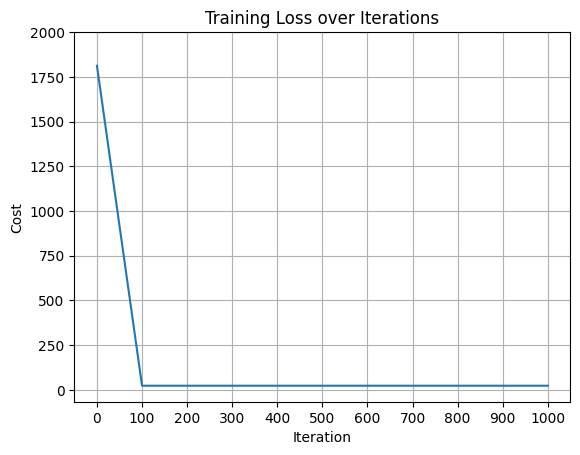

In [28]:
# Plot Cost Function

plt.plot(range(0, 1001, 100), cost_history)

plt.title("Training Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.xticks(np.arange(0, 1001, 100))
plt.yticks(np.arange(0, 2001, 250))

plt.grid(True)
plt.show()

### **6. Evalute on test data**

In [29]:
y_pred_test = np.round(predict(X_test.values, w_final, b_final),2)

In [30]:
print(y_pred_test.tolist())

[[66.71], [66.62], [66.46], [66.46], [66.41], [66.0], [66.62], [66.32], [66.46], [66.25], [66.59], [66.36], [66.82], [66.51], [66.46], [66.14], [66.76], [66.72], [66.54], [66.26], [66.35], [66.23], [65.97], [66.31], [66.56], [66.11], [66.35], [66.38], [66.2], [66.28], [66.2], [66.83], [66.63], [66.39], [66.34], [66.3], [66.33], [66.51], [66.42], [66.59], [66.2], [66.15], [66.51], [66.4], [66.46], [66.52], [66.4], [66.72], [66.09], [66.83], [66.3], [66.5], [66.42], [66.45], [66.74], [66.48], [66.28], [66.5], [66.32], [66.41], [66.22], [66.59], [66.42], [66.45], [66.37], [66.52], [66.3], [66.49], [66.38], [66.39], [66.59], [66.45], [66.32], [66.43], [66.89], [66.07], [66.34], [66.22], [66.77], [66.33], [66.47], [66.54], [66.22], [66.31], [66.49], [66.62], [66.25], [66.63], [66.53], [66.69], [66.46], [66.52], [66.57], [66.18], [66.57], [66.31], [66.57], [66.46], [66.64], [66.39], [66.38], [66.57], [66.5], [66.36], [66.72], [66.42], [66.4], [66.4], [66.47], [66.49], [66.49], [66.21], [66.4

In [31]:
print(y_test.values.tolist())

[70, 76, 63, 50, 71, 71, 67, 65, 74, 75, 61, 76, 67, 70, 66, 72, 53, 69, 62, 73, 65, 66, 63, 68, 61, 69, 73, 60, 50, 57, 68, 59, 63, 63, 59, 66, 68, 74, 54, 65, 69, 64, 63, 58, 66, 63, 67, 75, 81, 54, 77, 91, 78, 62, 62, 68, 67, 66, 69, 75, 70, 77, 59, 58, 84, 64, 70, 66, 73, 70, 69, 74, 67, 60, 57, 70, 48, 62, 51, 61, 70, 63, 66, 59, 53, 89, 65, 85, 56, 61, 67, 76, 69, 61, 76, 61, 65, 72, 69, 58, 67, 64, 67, 64, 57, 73, 72, 67, 58, 61, 63, 69, 81, 57, 64, 68, 68, 59, 84, 70, 63, 76, 70, 58, 68, 68, 70, 57, 69, 77, 60, 71, 70, 67, 59, 66, 56, 61, 67, 67, 66, 60, 68, 56, 80, 64, 67, 74, 59, 74, 63, 56, 60, 61, 66, 72, 62, 70, 73, 50, 80, 67, 67, 61, 63, 69, 61, 73, 72, 61, 69, 67, 69, 71, 84, 81, 62, 77, 76, 62, 66, 51, 65, 63, 63, 67, 73, 64, 71, 74, 61, 57, 61, 63, 68, 58, 66, 68, 52, 74, 74, 81, 69, 72, 64, 68, 72, 81, 63, 75, 72, 51, 47, 61, 66, 64, 67, 75, 83, 70, 66, 63, 71, 60, 73, 69, 68, 66, 60, 56, 64, 68, 69, 65, 66, 63, 64, 71, 67, 74, 72, 67, 64, 67, 67, 57, 66, 72, 72, 64,

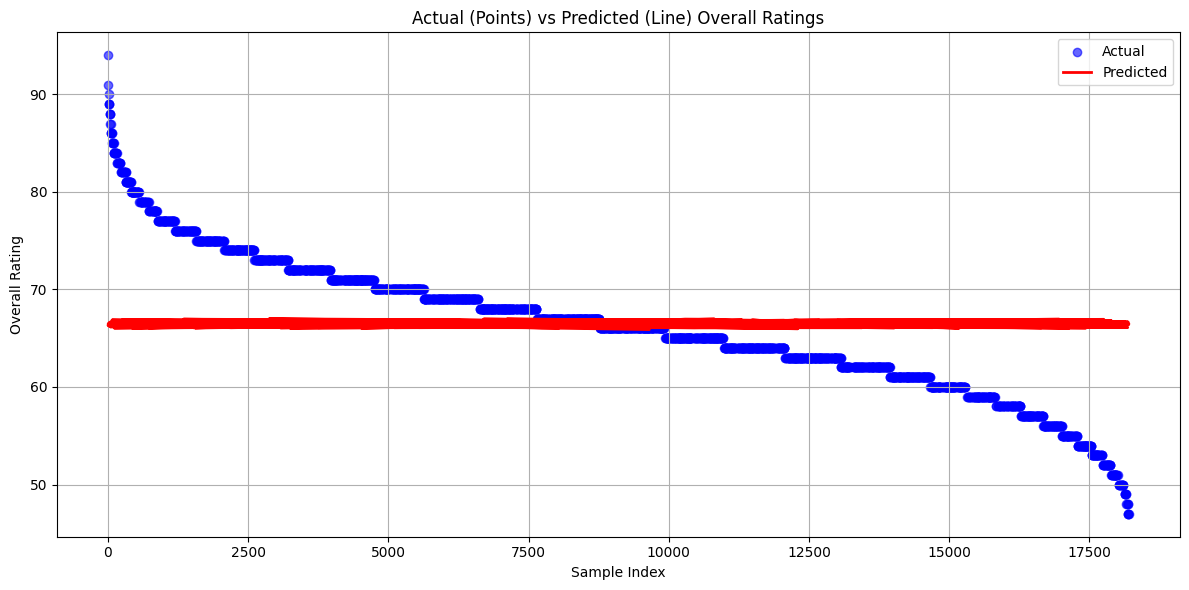

In [32]:
# Ensure y_pred is 1D
y_pred = y_pred_test.ravel()

# Align indexes
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_test_sorted = y_test.copy()
y_pred_sorted = y_pred_series.copy()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test_sorted.index, y_test_sorted, label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred_sorted.index, y_pred_sorted, label='Predicted', color='red', linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("Overall Rating")
plt.title("Actual (Points) vs Predicted (Line) Overall Ratings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print("R² score:", r2_score(y_test, y_pred))
print("Custom Model R² score:", r2_score(y_test, y_pred_test))

R² score: -0.0028329677975147405
Custom Model R² score: -0.0023525559583308375


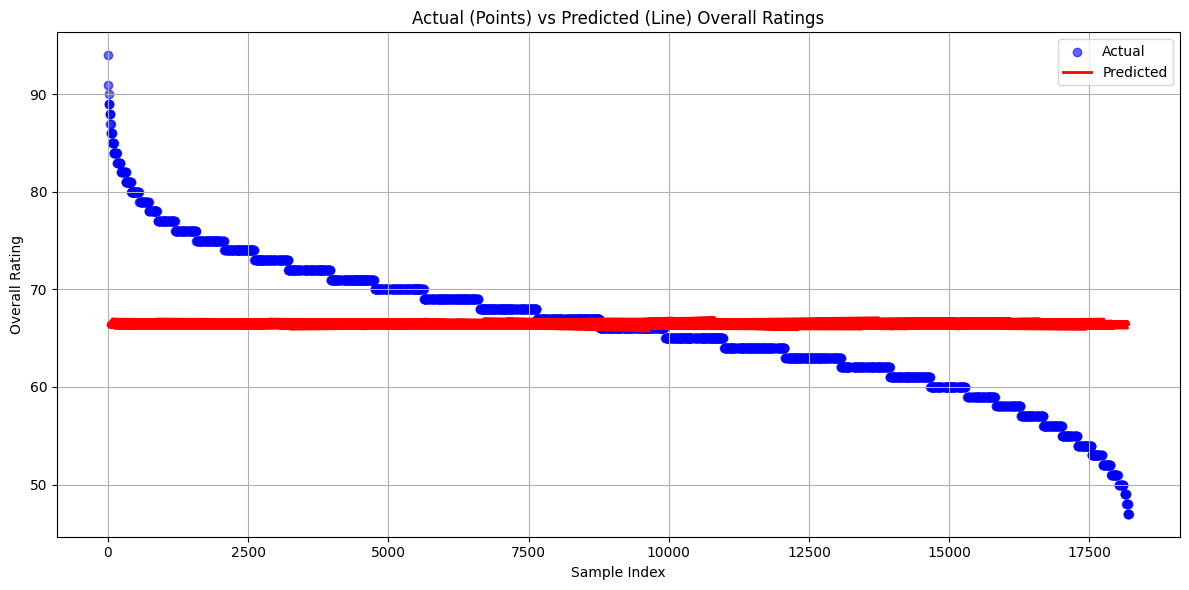

In [34]:
# Ensure y_pred is 1D
y_pred = y_pred.ravel()

# Align indexes
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_test_sorted = y_test.copy()
y_pred_sorted = y_pred_series.copy()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test_sorted.index, y_test_sorted, label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred_sorted.index, y_pred_sorted, label='Predicted', color='red', linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("Overall Rating")
plt.title("Actual (Points) vs Predicted (Line) Overall Ratings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **In this case the model isnt learning well since the dependency is probabbly not linear and is approximating around the mean**